In [5]:
import numpy as np
from scipy.io.netcdf import netcdf_file as NF
#from netCDF4 import Dataset as NF
import pylab as plt


n=0
ifid=NF('snap.cdf',mode='r')
(nt,nz,nx) = ifid.variables['phi'].shape
t = ifid.variables['Time'][:]
xt = ifid.variables['x'][:]*1#.astype(np.float64)
zt = ifid.variables['z'][:]*1#.astype(np.float64)
u =  ifid.variables['u'][n,:]*1#.astype(np.float64)
w =  ifid.variables['w'][n,:]*1#.astype(np.float64)
phi =  ifid.variables['phi'][n,:]*1#.astype(np.float64)
ifid.close()

print(nt,nz,nx)

2 800 800


/Users/ceden/opt/anaconda3/lib/python3.8/site-packages/scipy/io/netcdf.py:308: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  warnings.warn((


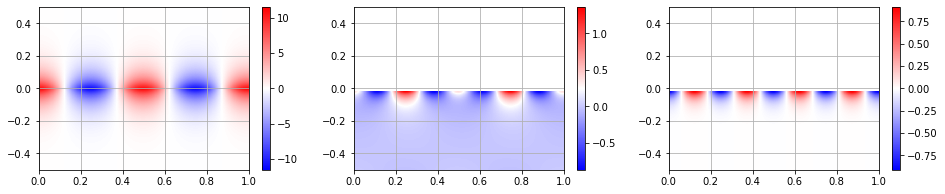

In [9]:
k = 4*np.pi
om = np.sqrt(9.81*k)
zeta0=0.0105

u0 = zeta0*om*np.exp(-k*np.abs(zt[:,None]))*np.cos(k*xt[None,:]-om*t[n])
u1 = -k*zeta0**2*om*np.exp(-2*k*np.abs(zt[:,None]))*np.cos(2*k*xt[None,:]-2*om*t[n])

plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
co = plt.pcolormesh(xt,zt,u0*100,cmap='bwr',shading='auto')
plt.colorbar(co)
plt.grid()
plt.subplot(1,3,2)
co = plt.pcolormesh(xt,zt,np.where(zt[:,None]>-0.02,np.nan,(u-u0)*100),cmap='bwr',shading='auto')
plt.colorbar(co)
plt.grid()
plt.subplot(1,3,3)
co = plt.pcolormesh(xt,zt,np.where(zt[:,None]>-0.02,np.nan,u1*100),cmap='bwr',shading='auto')
plt.colorbar(co)
plt.grid()

plt.show()


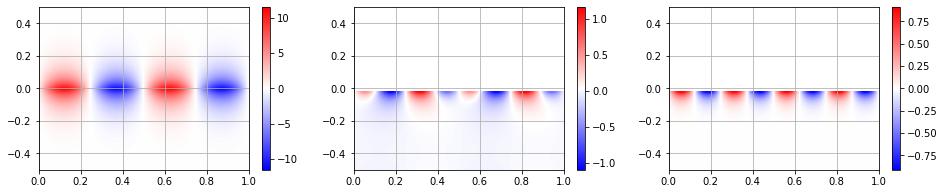

In [8]:
w0 = zeta0*om*np.exp(-k*np.abs(zt[:,None]))*np.sin(k*xt[None,:]-om*t[n])
w1 = k*zeta0**2*om*np.exp(-2*k*np.abs(zt[:,None]))*np.sin(2*k*xt[None,:]-2*om*t[n])

plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
co = plt.pcolormesh(xt,zt,w0*100,cmap='bwr',shading='auto')
plt.colorbar(co)
plt.grid()
plt.subplot(1,3,2)
co = plt.pcolormesh(xt,zt,np.where(zt[:,None]>-0.02,np.nan,(w-w0)*100),cmap='bwr',shading='auto')
plt.colorbar(co)
plt.grid()
plt.subplot(1,3,3)
co = plt.pcolormesh(xt,zt,np.where(zt[:,None]>-0.02,np.nan,w1*100),cmap='bwr',shading='auto')
plt.colorbar(co)
plt.grid()

plt.show()

In [329]:
from IPython import display
n=30
rho_o,rho_a=1000.,1.
plt.figure(figsize=(16,3))
while True:
     phi =  NF('snap.cdf',mode='r').variables['phi'][n,:]*1#.astype(np.float64)
     u =  NF('snap.cdf',mode='r').variables['u'][n,:]*1#.astype(np.float64)
     w =  NF('snap.cdf',mode='r').variables['w'][n,:]*1#.astype(np.float64)
     t = NF('snap.cdf',mode='r').variables['Time'][n]   
     plt.clf() 
     plt.subplot(1,3,1)
     rho = rho_o*(1+phi)/2 + rho_a*(1-phi)/2   
     co = plt.pcolormesh(xt,zt,rho,cmap='jet',shading='auto' )
     plt.colorbar(co)
     plt.title('n=%i t=%3.2f'%(n,t) )
     plt.ylim([-.25,.25])
     plt.subplot(1,3,2)   
     co=plt.pcolormesh(xt,zt,u,shading='auto' ) 
     plt.colorbar(co)
     plt.ylim([-.25,.25])
     plt.subplot(1,3,3)   
     co=plt.pcolormesh(xt,zt,w,shading='auto' ) 
     plt.colorbar(co)
     plt.ylim([-.25,.25])  
     display.display(plt.gcf())
     display.clear_output(wait=True) 
     n+=1   

IndexError: index 30 is out of bounds for axis 0 with size 7

<Figure size 1152x216 with 0 Axes>

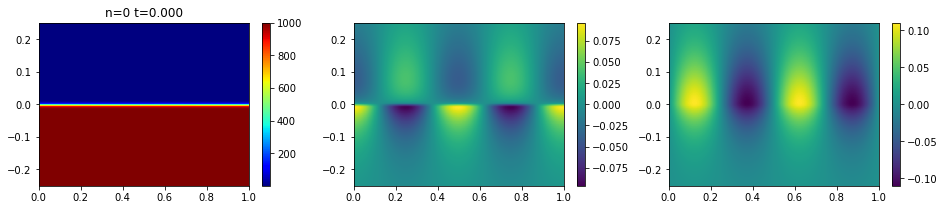

In [600]:
rho_o,rho_a=1000.,1.
rho = rho_o*(1+phi)/2 + rho_a*(1-phi)/2  

plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
co = plt.pcolormesh(xt,zt,rho,cmap='jet',shading='auto' )
plt.colorbar(co)
plt.title('n=%i t=%5.3f'%(n,t[n]) ) 
plt.ylim([-.25,.25])
plt.subplot(1,3,2)   
co=plt.pcolormesh(xt,zt,u,shading='auto' ) 
plt.colorbar(co)
plt.ylim([-.25,.25])
plt.subplot(1,3,3)   
co=plt.pcolormesh(xt,zt,w,shading='auto' ) 
plt.colorbar(co)
plt.ylim([-.25,.25])
plt.show()

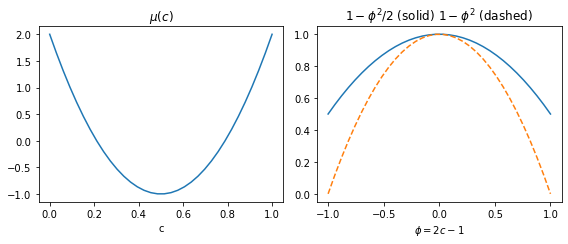

In [474]:
c=np.linspace(0,1,34)
phi = 2*c-1
plt.figure(figsize=(8,3.5))
plt.subplot(1,2,1)
plt.plot(c,12*c**2-12*c+2)
plt.xlabel('c')
plt.title('$\mu(c)$')
plt.subplot(1,2,2)
plt.plot(phi,1-0.5*phi**2)
plt.plot(phi,1-phi**2,'--')
plt.xlabel('$\phi=2c-1$')
plt.title('$1-\phi^2/2$ (solid) $1-\phi^2$ (dashed)')
plt.savefig('tmp.png')
plt.tight_layout()
plt.show()

4 4000


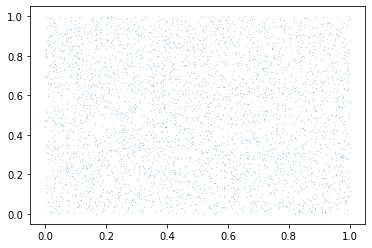

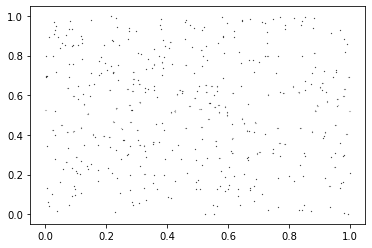

In [518]:
ifid=NF('particles.cdf',mode='r')
(nt,npa) = ifid.variables['pos_x'].shape
print(nt,npa)
t = ifid.variables['Time'][:]*1
x = ifid.variables['pos_x'][:]*1#.astype(np.float64)
z = ifid.variables['pos_z'][:]*1#.astype(np.float64)
ifid.close()
plt.plot(x[0,:],z[0,:],'.',markersize=0.2)
plt.show()

for n in range(0,npa,10):
 plt.plot(x[:,n],z[:,n],'.',markersize=0.2,color='k')
plt.show()


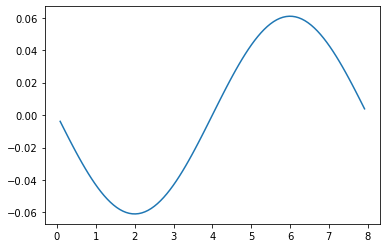

In [531]:
x=np.linspace(0,8,100)
dx=x[1]-x[0]
v=np.cos(2*np.pi*x/8)
plt.plot(x[1:-1],(v[2:]-v[:-2])/(2+dx))
#plt.plot(x,v,'r')
plt.show()

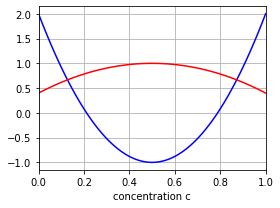

In [551]:
import numpy as np
import pylab as plt
gamma=0.6
c = np.linspace(0,1,101)
plt.figure(figsize=(4,3))
plt.plot(c,12*c**2-12*c+2,'b')
plt.plot(c,(1-gamma*(2*c-1)**2),'r')
plt.grid()
plt.xlim([0,1])
plt.xlabel('concentration c')
plt.tight_layout()
plt.savefig('tmp.png',dpi=200)
plt.show()